# 数据准备

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [6]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print ('X_test:',X_test.shape)
print ('y_test:',y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


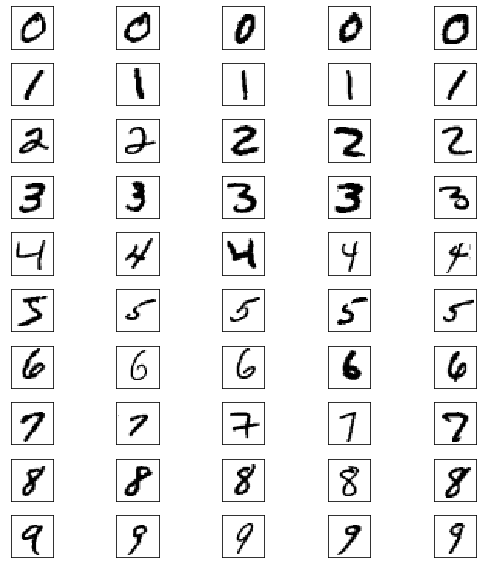

In [7]:
fig,axes = plt.subplots(10,5,figsize=(8,8)) #新建一个包含50张子图的10行5列的画布
for i in range(10): #对于每一个数字
    indice = np.where(y_train==i)[0] # 找到标签为数字i的图像下标
    for j in range(5): #输出前5张图像
        axes[i][j].imshow(X_train[indice[j]],cmap="gray_r")
        #将x_train_image的第i张图画在第i个子图上，这里用反灰度图，数字越大颜色越黑
        axes[i][j].set_xticks([])#移除图像的x轴刻度
        axes[i][j].set_yticks([])#移除图像的y宙刻度
plt.tight_layout() # 采用更紧凑美观的布局方式
plt.show() #显示图像

In [8]:
# 将数据reshape，CNN的输入是4维的张量（可看做多维的向量）
#第一维是样本规模，第二维和第三维是长度和宽度。第四维是像素通道
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)


In [9]:
#将输入转换到0~1范围的数
X_train = X_train / 255
X_test = X_test / 255

In [12]:
from keras.utils import np_utils
# 类别标签采用独热编码one-hot
# 类别标签采用独热编码one-hot
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
print(y_train[:5])
print(y_train_onehot[:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
def baseline_model():
    model = Sequential()
    model.add(Conv2D(filters=16,kernel_size=(5, 5), input_shape=(28, 28,1), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=36,kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model
# 建立模型
model = baseline_model()
print(model.summary())#查看模型摘要

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [14]:
# 对训练模型进行设置
#使用adam优化器，使用交叉熵做为损失函数
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
train_history=model.fit(x=X_train, y=y_train_onehot,validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 68s - loss: 0.5045 - acc: 0.8419 - val_loss: 0.1015 - val_acc: 0.9687
Epoch 2/10
 - 67s - loss: 0.1399 - acc: 0.9590 - val_loss: 0.0645 - val_acc: 0.9807
Epoch 3/10
 - 71s - loss: 0.1010 - acc: 0.9690 - val_loss: 0.0529 - val_acc: 0.9848
Epoch 4/10
 - 77s - loss: 0.0796 - acc: 0.9764 - val_loss: 0.0423 - val_acc: 0.9874
Epoch 5/10
 - 67s - loss: 0.0657 - acc: 0.9799 - val_loss: 0.0385 - val_acc: 0.9881
Epoch 6/10
 - 66s - loss: 0.0595 - acc: 0.9827 - val_loss: 0.0401 - val_acc: 0.9874
Epoch 7/10
 - 66s - loss: 0.0528 - acc: 0.9846 - val_loss: 0.0350 - val_acc: 0.9909
Epoch 8/10
 - 67s - loss: 0.0489 - acc: 0.9859 - val_loss: 0.0332 - val_acc: 0.9902
Epoch 9/10
 - 68s - loss: 0.0420 - acc: 0.9869 - val_loss: 0.0323 - val_acc: 0.9912
Epoch 10/10
 - 69s - loss: 0.0402 - acc: 0.9874 - val_loss: 0.0346 - val_acc: 0.9899


In [16]:
# 保存模型
filename='keras_mnistcnndemomodel.h5'
model.save(filename)

In [19]:
# 模型评估
scores = model.evaluate(X_test, y_test_onehot)
# 输出在测试集的准确度
print(scores[1])

10000/10000 [==============================] - 6s 588us/step
0.9915


In [25]:
prediction=model.predict_classes(X_test)
print('测试数据前10项的真实值:',y_test[:10])
print('测试数据前10项的预测值:',prediction[:10])
print('测试数据第340项的真实值:',y_test[340])
print('测试数据第340项的预测值:',prediction[340])
print('测试数据第341项的真实值:',y_test[341])
print('测试数据第341项的预测值:',prediction[341])
print('测试数据第342项的真实值:',y_test[342])
print('测试数据第342项的预测值:',prediction[342])

测试数据前10项的真实值: [7 2 1 0 4 1 4 9 5 9]
测试数据前10项的预测值: [7 2 1 0 4 1 4 9 5 9]
测试数据第340项的真实值: 5
测试数据第340项的预测值: 5
测试数据第341项的真实值: 6
测试数据第341项的预测值: 6
测试数据第342项的真实值: 1
测试数据第342项的预测值: 1


In [26]:
import pandas as pd
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,3,1,0,0
1,0,1134,1,0,0,0,0,0,0,0
2,1,1,1027,0,0,0,0,3,0,0
3,0,0,1,1005,0,1,0,1,2,0
4,0,0,0,0,980,0,0,0,0,2
5,2,0,0,5,0,880,4,0,0,1
6,3,3,0,0,1,0,950,0,1,0
7,0,3,4,1,0,0,0,1018,1,1
8,3,0,1,0,0,0,0,2,965,3


In [28]:
df=pd.DataFrame({'label':y_test,'predict':prediction})
df[(df.label==9)&(df.predict==4)]

,label,predict
1232,9,4
1901,9,4
2293,9,4
2406,9,4
2414,9,4
2720,9,4
2760,9,4
3850,9,4
3869,9,4
3985,9,4
